<a href="https://colab.research.google.com/github/DeviBhavani3/ML2021/blob/main/web_scraping_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import requests
import bs4
import textblob

In [3]:
wiki = requests.get("https://en.wikipedia.org/wiki/India")

In [4]:
from bs4 import BeautifulSoup

In [5]:
india=BeautifulSoup(wiki.content,'lxml')

In [6]:
india=india.getText(strip=True)

In [8]:
import re

In [9]:
india =re.sub(r'\[\d+\]',"",india)

In [10]:
india=re.sub(r'\[w+\]',"",india)

In [11]:
india=re.sub('[0-9]+',"",india)

In [37]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [38]:
from nltk.tokenize import  sent_tokenize

In [39]:
sentence = sent_tokenize(india)

In [40]:
len(sentence)

819

In [41]:
from textblob import TextBlob

In [42]:
def analyze_sentiment(tweet):
  analysis=TextBlob(tweet)
  if analysis.sentiment.polarity>0:
    return 'Positive'
  elif analysis.sentiment.polarity==0:
    return 'Neutral'
  else:
    return 'Negative'   

In [43]:
sentence=pd.DataFrame(sentence)

In [44]:
sentence.columns=['sentence']

In [45]:
sentence['sentiment']=[str(analyze_sentiment(x)) for x in sentence.sentence]

In [28]:
sentence.sentiment.value_counts()

neutral     493
positive    246
negative     80
Name: sentiment, dtype: int64

In [46]:
from nltk.tokenize import word_tokenize

In [47]:
indiawords=word_tokenize(india)

In [48]:
indiawords=[word for word in indiawords if word.isalnum()]

In [49]:
from nltk.corpus import stopwords

In [50]:
stop_words=set(stopwords.words('english'))

In [51]:
indiawords=[word for word in indiawords if not str.lower(word) in stop_words]

In [52]:
from nltk.probability import FreqDist

In [53]:
wordfreq = FreqDist(indiawords)

In [55]:
wordfreq

FreqDist({'India': 465, 'ISBN': 158, 'Indian': 145, 'pp': 120, 'retrieved': 113, 'Retrieved': 91, 'fromthe': 72, 'Press': 71, 'University': 67, 'PDF': 60, ...})

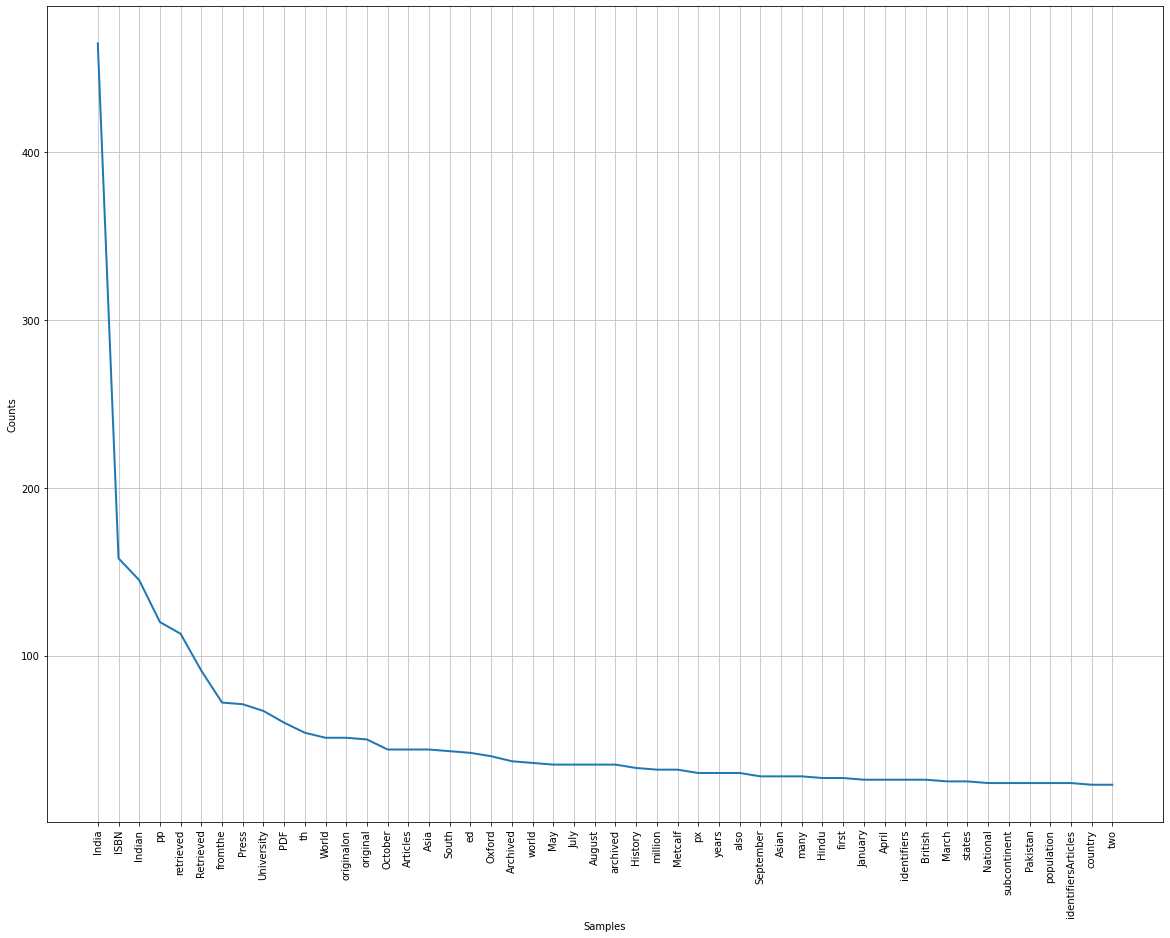

In [59]:
plt.figure(figsize=(20,15))
wordfreq.plot(50,cumulative=False)

In [60]:
indiawords=[w for w in indiawords if not w in ['ISBN','pp','PDF','fromthe','ed','th','also','press']]

In [62]:
from wordcloud import WordCloud

In [65]:
india_words=(" ").join(indiawords)

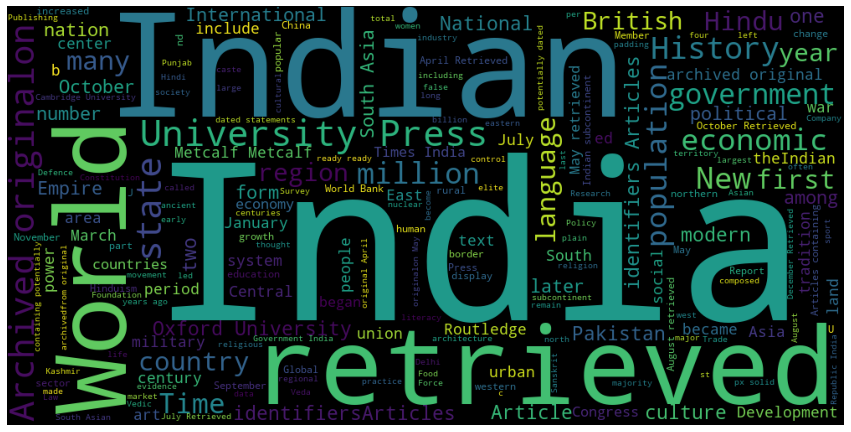

In [69]:
wordcloud=WordCloud(width=1000,height=500).generate(india_words)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
